This code identifies the number of recommended clusters. 

In [4]:
import sklearn.metrics.pairwise 
from numpy import genfromtxt
import pandas as pd
import matplotlib.pyplot as plt
import seaborn 
from sklearn.utils.graph import graph_laplacian
from sklearn.utils.arpack import eigsh
from sklearn.manifold.spectral_embedding_ import _set_diag
import numpy as np

# data should be a similarity matrix saved in CDV format
sim_yelp = pd.read_csv("your sim matrix", delimiter=',')


print sim_yelp.shape


sim_yelp = sim_yelp.iloc[:,1:].to_sparse()
sim_yelp= np.squeeze(np.asarray(sim_bos))




(81, 82)


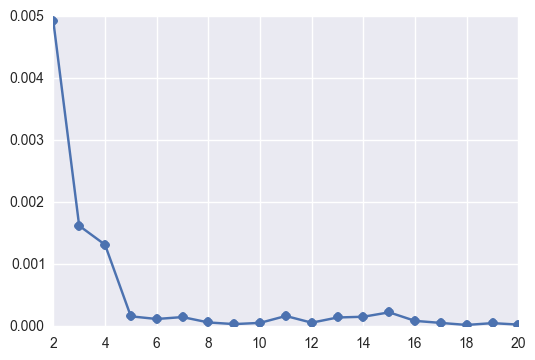

In [5]:

for data in [sim_yelp]:

    %matplotlib inline
    normed_laplacian, dd = graph_laplacian(data, normed=True, return_diag=True)
    laplacian = _set_diag(normed_laplacian, 1)


    n_components = data.shape[0] - 1


    eigenvalues, eigenvectors = eigsh(-laplacian, k=n_components, which="LM", sigma=1.0, maxiter=5000)
    eigenvalues = -eigenvalues[::-1]  # Reverse and sign inversion.

    max_gap = 0
    gap_pre_index = 0
    gaps = []
    for i in range(1, eigenvalues.size):
        gap = eigenvalues[i] - eigenvalues[i - 1]
        gaps.append(gap)
        if gap > max_gap:
            max_gap = gap
            gap_pre_index = i - 1
           
    k = gap_pre_index + 1
    plt.plot(range(1, eigenvalues.size)[1:20], gaps[1:20], '-o')

